<a href="https://github.com/jhermosillo/diplomado_CDD2019/blob/modulo4/Notebooks/Clasificación_Bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="../img/cerebro_1.jpg"  width="70%"/>

<h1 style="font-size:50px;" align="center">Clasificación Bayesiana</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Libro de referencia</u>:
* Bishop, Christopher M. ( 2006). Pattern recognition and machine learning. New York. Springer.

<img src="../img/enfoque_bayesiano.jpg" width="80%"/>

## <u>I. El problema de Clasificación desde la perspectiva Bayesiana</u>

* Supongamos que tenemos un vector de datos de entrada $\textrm{x}$, junto con un vector objetivo correspondiente $\textrm{t}$.
* __Regresión__: $\textrm{t}$ es un vector de valores numéricos reales.
* __Clasificación__: $\textrm{t}$ es un vector de clases.

* La probabilidad conjunta $p(\textrm{x}, \textrm{t})$ contiene toda la información respecto de estas variables y **describe la incertidumbre** asociada a ellas.
* Determinar $p(\textrm{x}, \textrm{t})$ de un conjunto de **datos de entrenamiento** es un ejemplo de inferencia, y en general un problema muy difícil.
* En situaciones prácticas, debemos hacer una **predicción** respecto del valor de $\textrm{t}$, o tener una idea de su valor con el fin de **tomar una decisión**. 
* Generalmente la decisión consiste, en el caso de la **Clasificación**, en **asignar un nuevo dato a una de las clases**, y en el caso de la **Regresión**, **hacer corresponder a una nueva variable de entrada el valor numérico "óptimo"**. 

&#9758; Desde un enfoque Bayesiano, el problema de Clasificación se puede describir de la siguiente forma:

$$
p(\mathcal{C}_k|\textrm{x}) = \frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{p(\textrm{x})}\;\;\;\;\;\;\;(12)
$$


* El problema de la decisión puede resolverse de tres maneras posibles:
<ol>
    <li> Primero resuelve el problema de inferencia de determinar las distribuciones de probabilidad condicional a las clases $p(\textrm{x}|\mathcal{C}_k)$ para cada clase $\mathcal{C}_k$ individualmente. Además, infiere las probabilidades sobre el <i>a-priori</i> de cada clase $p(\mathcal{C}_k)$. Luego, usa el teorema de Bayes (12) para encontrar los <i>a-posterioris</i> $p(\mathcal{C}_k|\textrm{x})$. Como es habitual, el denominador puede calcularse de la siguiente forma:<br>&nbsp;
        $$
        p(\textrm{x}) = \sum_k p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)\;\;\;\;\;\;\;(13)
        $$     
        Habiendo encontrado las distribuciones <i>a-posteriori</i>, usa el criterio de <b>MAP</b> (<i>Máximo A Posteriori</i>) para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que explícita o implícitamente modelan las distribuciones de entradas y salidas se llaman <b><i>modelos generativos</i></b>, ya que se pueden generar datos sintéticos muestreándolos. <br> &#9758; P.Ej. <i>Naïve Bayes</i></li>
    <li> Primero resuelve el problema de inferencia de las distribuciones <i>a-posteriori</i> $p(\mathcal{C}_k|\textrm{x})$, y después usa el criterio de MAP para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que modelan directamente las distribuciones <i>a-posteriori</i> se llaman  <b><i>modelos discriminativos</i></b> <br> &#9758; P.Ej. <i>Regresión Logística</i></li>
    <li> Encuentra una función $f(\textrm{x})$, llamada <b><i>función discriminante</i></b>, que mapea cada entrada $\textrm{x}$ directamente a una clase. Por ejemplo, en el caso de la clasificación binaria, $f=0$ representa la clase $\mathcal{C}_1$ y $f=1$ la clase $\mathcal{C}_2$. En este caso, las probabilidades no se utilizan. <br> &#9758; P.Ej. <i>SVM</i> o <i>RRNN.</i></li>

___
___

## &#9991; <u>II. Aprendizaje: Ajuste de un Modelo</u>

* En el caso en que se desee implementar un clasificador mediante un modelo generativo, la sección anterior sugiere modelar los datos como distribuciones de probabilidad.
* Un supuesto importante es considerar que los datos son independientes e idénticamente distribuidos (_iid_).
* En este curso vamos a usar distribuciones paramétricas (e.g. Binomial o Gaussiana), ya que están gobernadas por un número pequeño de parámetros y se utilizan muy ampliamente en la literatura.
* EL **aprendizaje** es este caso, consiste en ajustar un modelo a los datos.
* Para ajustar los parámetros de estos modelos, vamos a seguir dos principios: el de **Máximo de Verosimilitud** (frecuentista) o el **Bayesiano** (calcular el a posteriori, partiendo de un a priori, conforme se observan datos).

### II.1 Ajuste de un modelo por Máximo de Verosimilitud (_Maximum Likelihood_) 

* Ajustar un modelo a los datos, es estimar los parámetros del modelo, una vez que se ha elegido su forma paramétrica.
* Desde un punto de vista frecuentista, se pueden estimar los parámetros mediante la maximización de la función de verosimilitud (_likelyhood_).  
* Por el teorema de Bayes, sabemos que para un conjunto de datos $D=\{x_1,\ldots,x_N\}$, la distribución de los parámetros ($\theta$) puede describirse de la siguiente forma:

$$
p(\theta|D) \propto \underbrace{p(D|\theta)}_{likelyhood}p(\theta)
$$


* Supongamos que tenemos datos uni-dimensionales, cuyo origen desconocemos... 

In [35]:
import scipy.stats as stats

def datos_misteriosos(n):
    data = stats.bernoulli.rvs(0.5, size=n[-1])
    return data

#Observaciones  
n_trials = [0, 1, 2, 3, 4, 5, 15, 50, 100, 500]
D=datos_misteriosos(n_trials)

print(D)

[0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 

* Suponiendo una distribución Gaussiana, ajustemos este modelo a nuestros datos:  

La Gaussiana uni-dimensional:
$$
\displaystyle p(x|\mu,\sigma^2)=\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{2\pi\sigma^2}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}\hspace{7em}(14)
$$

La Gaussiana multidimensional:
$$
\displaystyle p(\textrm{x}|\mathbf{\mu},\Sigma)=\mathcal{N}(\textrm{x}|\mathbf{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}\exp\left\{-\frac{1}{2}(\textrm{x}-\mu)^\textrm{T}\Sigma^{-1}(\textrm{x}-\mu)\right\}\hspace{3em}(15)
$$

* Para ello vamos a maximizar la función de verosimilitud (_likelyhood_), dadas N observaciones:

$$
\displaystyle p(\textrm{x}|\mu,\sigma^2)=\prod_{n=1}^{N}\mathcal{N}(x_n|\mu,\sigma^2)\hspace{3em}(16)
$$

* En estos casos es común calcular el $\log$ del likelyhood:

$$
\displaystyle \ln p(\textrm{x}|\mu,\sigma^2)=-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2 -\frac{N}{2}\ln \sigma^2 -\frac{N}{2}\ln (2\pi)\hspace{3em}(17)
$$

&#9758; Maximizando (17) con respecto a $\mu$, obtenemos:

$$
\displaystyle \mu_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N x_n \hspace{3em}(18)
$$

&#9758; Maximizando (17) con respecto a $\sigma^2$, obtenemos:

$$
\displaystyle \sigma^2_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N (x_n-\mu_{\textrm{ML}})^2 \hspace{3em}(19)
$$

&#9998; **Define una función que calcule los parámetros $\mu_{\textrm{ML}}$ y $\sigma^2$ para nuestros datos $D$, <u>en función del número de observaciones</u>. Compara estos cálculos contra los que te da numpy.**

In [49]:
#Observaciones  
n_trials = [0, 1, 2, 3, 4, 5, 15, 50, 100, 500]

for n in n_trials:
    d=D[:n]
    # TU CODIGO AQUI
    

* Un problema con la estimación de los parámetros por ML es el _**overfitting**_ : la estimación "se apega" a los datos.
* Otro problema es el sesgo en la varianza.

<img src="../img/ML_varianza.jpg" width="100%">

___

### II.2 Ajuste Bayesiano de un modelo

* Como hemos dicho, el enfoque Bayesiano consiste en tener una "idea" de cuál sería la distribución a priori (modelo) de los datos para ir ajustando esa distribución conforme vamos teniendo datos nuevos, con el fin de calcular su distribución a posteriori.

* En en este contexto, si suponemos que la distribución a posteriori tiene una cierta forma funcional, se utilizan _**a prioris conjugados**_, que son modelos que permiten calcular a posterioris con esa forma funcional. 

* Por ejemplo, supongamos que elegimos una distribución de Bernoulli para nuestros "datos misteriosos".

$$
p(x|\theta)=\textrm{Bern}(x|\mu)=\mu^x(1-\mu)^{1-x}\hspace{5em}(20)
$$

Dado $N$ observaciones: $D=\{x_1,\ldots,x_N\}$, la expresión del _likelyhood_:

$$
\displaystyle p(D|\mu)=\prod_{n=1}^{N}p(x_n|\mu)=\prod_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_{n}}\hspace{3em}(21)
$$

* Podríamos maximizar la _likelyhood_ (21) como lo hicimos arriba para la Gaussiana.
* La expresión resultante sería la misma!

$$
\displaystyle \mu_{\textrm{ML}}= \frac{1}{N}\sum_{n=1}^N x_n \hspace{3em}(22)
$$

* Si llamamos $m$ el número de observaciones de un $1$ en los datos $D$, por (22) tendríamos:

$$
\mu_{\textrm{ML}}=\frac{m}{N}\hspace{4em}(23)
$$
___

* Hagamos una estimación Bayesiana de $\mu$.
* &#9758; Tomemos $m$ como la variable observada. Necesitamos usar ahora una distribución Binomial.

$$
p(m|\mu)=\textrm{Bin}(m|N\mu)=\binom{N}{m}\mu^m(1-\mu)^{N-m}\hspace{3em}(24)
$$
donde

$$
\binom{N}{m}=\frac{N!}{(N-m)!m!}
$$
es el número de formas de elegir $m$ objetos de un total de $N$ objetos.
* &#9758; Usaremos ahora un _**a priori conjugado**_: la distribución Beta.

$$
p(\mu)=\textrm{Beta}(\mu|a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}\hspace{3em}(25)
$$
donde 
$$
\Gamma(x)\equiv\int_0^\infty u^{x-1}e^{-u}\textrm{d}u
$$
* EL promedio y la varianza de la distribución Beta están dados por:

$$
\mathbb{E}[\mu]=\frac{a}{a+b}\hspace{8em}(26)
$$

$$
\textrm{var}[\mu]=\frac{ab}{(a+b)^2(a+b+1)}\hspace{3em}(27)
$$

*  &#9758; Ahora, nuestra distribución _**a posteriori**_ de $\mu$ se obtiene multiplicando el a priori Beta (25) por la _likelyhood_ Binomial (24). 
* &#9758; Trabajando sólo los factores que dependen de $\mu$, podemos ver que la expresión del _**a posteriori**_ $p(\mu|m) \propto p(m|\mu)p(\mu)$ tiene la forma:

$$
p(\mu|m,l,a,b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1}\hspace{3em}(28)
$$

donde $l=N-m$ y por lo tanto corresponde al número de $0$'s en nuestro ejemplo.

* De hecho el a posteriori es una distribución Beta, y su coeficiente de normalización se puede encontrar comparando con (25):

$$
p(\mu|m,l,a,b)=\frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}\hspace{3em}(29)
$$

* &#9758; Vemos que el efecto de tener un conjunto de datos con $m$ observaciones de $x=1$ y $l$ observaciones de $x=0$ ha sido incrementar los valores de $a$ por $m$ y de $b$ por $l$, yendo de la distribución a priori a la distribución a posteriori.
* &#9758; Esto nos permite dar una interpretación sencilla a los hyperparámetros $a$ y $b$ en el a priori como _**el número efectivo de observaciones de**_ $x=1$ y $x=0$ respectivamente.
* &#9758; Nota que $a$ y $b$ no necesitan ser enteros.
* &#9758; Nota también que el a posteriori, puede volver a ser el a priori, si se observan nuevos datos, repitiendo el ciclo con (29) como a priori y (24) como likelyhood. El resultado tendrá la forma de (29) nuevamente, pero con los parámetros actualizados con las nuevas observaciones efectivas de $x=1$ ($m$) y $x=0$ ($l$).

* Si el experimento es el lanzamiento de una moneda y queremos predecir el valor del siguiente lanzamiento: $p(x=1|D)$, aplicamos las reglas de la suma y del producto:

$$
p(x=1|D)=\int_0^1 p(x=1,\mu|D)\textrm{d}\mu=\int_0^1 p(x=1|\mu)p(\mu|D)\textrm{d}\mu=\int_0^1 \mu p(\mu|D)\textrm{d}\mu = \mathbb{E}[\mu|D]
$$

* Utilizando (29) como el a posteriori de $p(\mu|D)$ junto con (26) para el cálculo de la media de la distribución Beta, tenemos:

$$
p(x=1|D)=\frac{m+a}{m+a+l+b}\hspace{5em}(30)
$$

*  &#9758; Para un conjunto grande de datos $m,l\to \infty$, y el resultado (30) tiende a ser el mimso que (23)

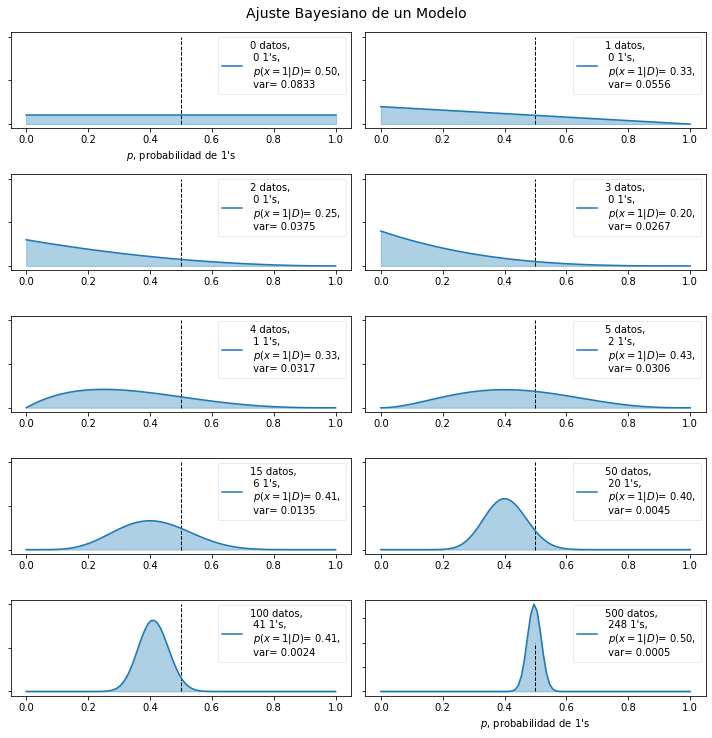

In [50]:
fig=plt.figure(figsize=(10,10))

dist = stats.beta
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    ax = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probabilidad de 1's") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(ax.get_yticklabels(), visible=False)
    m = D[:N].sum()
    l=N-m
    a=1+m
    b=1+l
    mu=(a)/(a+b)
    var=a*b/((a+b)*(a+b)*(a+b+1))
    y = dist.pdf(x, a, b)
    plt.plot(x, y, label="%d datos,\n %d 1's, \n $p(x=1|D)$= %2.2f, \n var= %2.4f  " %(N, m, mu,var))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 10, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)


plt.suptitle("Ajuste Bayesiano de un Modelo",
             y=1.02,
             fontsize=14)

plt.tight_layout()

___
___

## &#9991; <u>III. Modelos Generativos de Clasificación</u>